# "Image-based Driver Drowsiness Classification using Neural Network"

## Tugas Besar IF5181 - Pengenalan Pola

23521027 - Kadek Denaya Rahadika

23521037 - Krisna Fathurahman

---

## Spesifikasi Soal

1. Gunakanlah dataset klasifikasi yang sudah dieksplorasi, berikanlah deskripsi dari minimal 3 model terbaik yang sudah ada dari studi literatur dalam 3 tahun terakhir untuk dataset tersebut.

2. Tuliskan desain eksperimen, dengan mencantumkan:
a. faktor apa yang diobservasi, variabel response yang digunakan, dan skenario eksperimen yang dilakukan. Teknik learning yang digunakan minimal menggunakan teknik yang dipelajari di kuliah (minimal DTL dan ANN).
b. skema eksperimen (terutama terkait data latih, validasi, dan tes) dan komposisi data sesuai skema tersebut.

3. Tuliskan hasil eksperimen dan analisisnya. Analisis dapat berupa perbandingan antar model, atau memberikan contoh error atau kasus penting yg perlu diobservasi, atau interpretasi hasil eksperimen berbasiskan statistik.

4. Pengumpulan tugas berupa notebook ipynb yang dilengkapi dengan rekap hasil eksperimen pada notebook tersebut.

5. Setiap kelompok akan mempresentasikan hasilnya pada Selasa 30 November 2021 dan Kamis 2 Desember, dan menyiapkan juga dalam bentuk video maksimum selama 10 menit (jika ada problem koneksi nantinya). Tuliskan link video pada bagian akhir notebook.

---

## I. Latar Belakang

Kelompok kami akan menggunakan dataset berupa gambar wajah manusia berlabel *drowsy* atau *not drowsy* pada pranala berikut ini yang didapatkan dari situs kaggle.com. Adapun fitur-fitur yang dapat diambil dari dataset tersebut antara lain:

*   Wajah
*   Orientasi wajah
*   Mata
*   Mulut

Target kelas dari permasalahan ini berupa single-class yang bernilai antara ***drowsy*** atau ***not drowsy***

## II.1. Desain Eksperimen

Dalam eksperimen ini, kami akan membandingkan model lain dengan model utama yang akan dieksplor, yaitu CNN yang kami bangun sendiri. Setelah itu, kita akan lihat bagaimana proses Transfer Learning juga dapat membantu proses pembuatan model. Model yang akan kami gunakan dalam Tranfer Learning adalah ResNet152.  

Dalam mengevaluasi model, kami menggunakan validation set yang sebelumnya sudah kami tetapkan dan dibangun secara random dari training set yang ada. Performance measure yang digunakan adalah akurasi.

# II. Percobaan sebelumnya

## II.1. Decision Tree Learning

## II.2. Fully Connected NN

# III. Percobaan Utama -- CNN

### Mencoba menggunakan data yang dibangun menjadi berukuran 64x64x3

In [1]:
import tensorflow

training_set = tensorflow.keras.preprocessing.image_dataset_from_directory(
    "/home/internet/itb/pattern_recognition/training_set",
    seed=101,
    image_size=(64, 64),
    batch_size=32
)
validation_set = tensorflow.keras.preprocessing.image_dataset_from_directory(
    "/home/internet/itb/pattern_recognition/validation_set",
    seed=101,
    image_size=(64, 64),
    batch_size=32
)

Found 9120 files belonging to 2 classes.
Found 106 files belonging to 2 classes.


In [23]:
training_set.class_names

['drowsy', 'not_drowsy']

### Base Model

Berikut merupakan base model yang kami gunakan

In [2]:
from tensorflow.keras import layers, models

model = models.Sequential(
  [
    layers.Conv2D(8, (3, 3), activation="relu", padding="same", input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="relu"),
    layers.Dense(1, activation="sigmoid")
  ],
  name="Model"
)

In [25]:
model.summary()

Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 64, 64, 8)         224       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 32, 32, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        2336      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 8, 8, 64)         0     

In [26]:
model.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=['accuracy']
)

In [27]:
history = model.fit(training_set,validation_data=validation_set, epochs=10)

Epoch 1/10
285/285 [==============================] - 30s 103ms/step - loss: 1.2963 - accuracy: 0.5002 - val_loss: 0.6912 - val_accuracy: 0.6981
Epoch 2/10
285/285 [==============================] - 28s 97ms/step - loss: 0.6932 - accuracy: 0.4965 - val_loss: 0.6919 - val_accuracy: 0.6981
Epoch 3/10
285/285 [==============================] - 29s 101ms/step - loss: 0.6932 - accuracy: 0.4936 - val_loss: 0.6924 - val_accuracy: 0.6981
Epoch 4/10
285/285 [==============================] - 30s 105ms/step - loss: 0.6932 - accuracy: 0.4976 - val_loss: 0.6928 - val_accuracy: 0.6981
Epoch 5/10
285/285 [==============================] - 32s 110ms/step - loss: 0.6932 - accuracy: 0.4954 - val_loss: 0.6927 - val_accuracy: 0.6981
Epoch 6/10
285/285 [==============================] - 31s 106ms/step - loss: 0.6932 - accuracy: 0.4967 - val_loss: 0.6927 - val_accuracy: 0.6981
Epoch 7/10
285/285 [==============================] - 30s 102ms/step - loss: 0.6932 - accuracy: 0.4954 - val_loss: 0.6933 - val_acc

<AxesSubplot:>

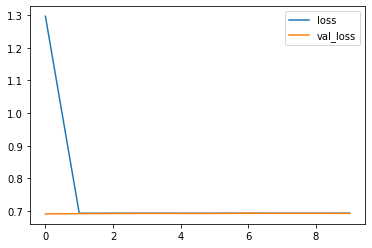

In [3]:
import pandas as pd

metrics_df = pd.DataFrame(history.history)
metrics_df[["loss","val_loss"]].plot()

<AxesSubplot:>

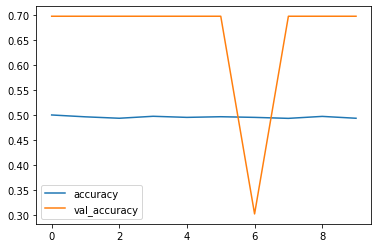

In [29]:
metrics_df[["accuracy","val_accuracy"]].plot()

Model terlihat belum dapat 'melihat' feature map dari dalam training data, diperlihatkan dari tidak adanya perkembangan di tiap epoch nya.

Kita akan mencoba menggunakan pixel yang lebih besar.

### Mencoba menggunakan data yang dibangun menjadi berukuran 200x200x3

Found 9120 files belonging to 2 classes.
Found 106 files belonging to 2 classes.
Epoch 1/10
285/285 [==============================] - 124s 432ms/step - loss: 1.3526 - accuracy: 0.7873 - val_loss: 0.7156 - val_accuracy: 0.8396
Epoch 2/10
285/285 [==============================] - 131s 458ms/step - loss: 0.3345 - accuracy: 0.8440 - val_loss: 0.7282 - val_accuracy: 0.7830
Epoch 3/10
285/285 [==============================] - 127s 442ms/step - loss: 0.3080 - accuracy: 0.8546 - val_loss: 0.6611 - val_accuracy: 0.7547
Epoch 4/10
285/285 [==============================] - 116s 406ms/step - loss: 0.2934 - accuracy: 0.8674 - val_loss: 0.7368 - val_accuracy: 0.7453
Epoch 5/10
285/285 [==============================] - 113s 393ms/step - loss: 0.2726 - accuracy: 0.8747 - val_loss: 0.8130 - val_accuracy: 0.7264
Epoch 6/10
285/285 [==============================] - 115s 400ms/step - loss: 0.2603 - accuracy: 0.8819 - val_loss: 0.8577 - val_accuracy: 0.6321
Epoch 7/10
285/285 [=======================

<AxesSubplot:>

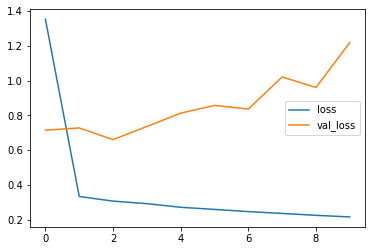

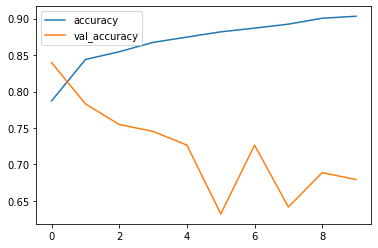

In [30]:
training_set = tensorflow.keras.preprocessing.image_dataset_from_directory(
    "/home/internet/itb/pattern_recognition/training_set",
    seed=101,
    image_size=(200, 200),
    batch_size=32
)
validation_set = tensorflow.keras.preprocessing.image_dataset_from_directory(
    "/home/internet/itb/pattern_recognition/validation_set",
    seed=101,
    image_size=(200, 200),
    batch_size=32
)


model = models.Sequential(
  [
    layers.Conv2D(8, (3, 3), activation="relu", padding="same", input_shape=(200, 200, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="relu"),
    layers.Dense(1, activation="sigmoid")
  ],
  name="Model"
)

model.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=['accuracy']
)

history = model.fit(training_set,validation_data=validation_set, epochs=10)
metrics_df = pd.DataFrame(history.history)
metrics_df[["loss","val_loss"]].plot()
metrics_df[["accuracy","val_accuracy"]].plot()

Dengan pixel yang lebih besar, terlihat training accuracy sudah meningkat seiring berjalannya training.

Namun, permasalahan baru muncul, yaitu overfitting terhadap validation set.

### Pencegahan Overfitting

- Menambahkan Dropout Layer untuk mengurangi network complexity
- Menggunakan early stopping callback

Found 9120 files belonging to 2 classes.
Found 106 files belonging to 2 classes.
Epoch 1/10
285/285 [==============================] - 133s 463ms/step - loss: 0.6087 - accuracy: 0.6729 - val_loss: 0.7703 - val_accuracy: 0.5377
Epoch 2/10
285/285 [==============================] - 123s 427ms/step - loss: 0.3666 - accuracy: 0.8297 - val_loss: 0.7826 - val_accuracy: 0.6038
Epoch 3/10
285/285 [==============================] - 119s 417ms/step - loss: 0.3297 - accuracy: 0.8481 - val_loss: 0.8357 - val_accuracy: 0.5377
Epoch 4/10
285/285 [==============================] - 130s 452ms/step - loss: 0.3069 - accuracy: 0.8610 - val_loss: 0.7791 - val_accuracy: 0.5283
Epoch 5/10
285/285 [==============================] - 121s 421ms/step - loss: 0.2905 - accuracy: 0.8703 - val_loss: 0.7901 - val_accuracy: 0.6604
Epoch 6/10
285/285 [==============================] - 114s 397ms/step - loss: 0.2810 - accuracy: 0.8682 - val_loss: 0.7741 - val_accuracy: 0.6415
Epoch 7/10
285/285 [=======================

<AxesSubplot:>

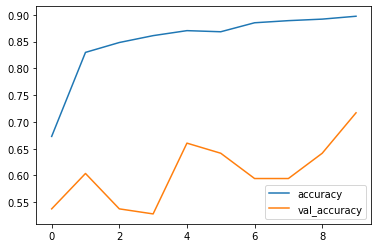

In [5]:
training_set = tensorflow.keras.preprocessing.image_dataset_from_directory(
    "/home/internet/itb/pattern_recognition/training_set",
    seed=101,
    image_size=(200, 200),
    batch_size=32
)
validation_set = tensorflow.keras.preprocessing.image_dataset_from_directory(
    "/home/internet/itb/pattern_recognition/validation_set",
    seed=101,
    image_size=(200, 200),
    batch_size=32
)

# add early stopping callback
from tensorflow.keras.callbacks import EarlyStopping
callbacks = [
  EarlyStopping(monitor='loss', patience=3),
]

model = models.Sequential(
  [
    layers.Conv2D(8, (3, 3), activation="relu", padding="same", input_shape=(200, 200, 3)),
    layers.MaxPooling2D((2, 2)),
    # add dropout layers
    layers.Dropout(0.1),

    layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),

    layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),

    layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.25),

    layers.Dense(10, activation="relu"),
    layers.Dense(1, activation="sigmoid")
  ],
  name="Model"
)

model.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=['accuracy']
)

history = model.fit(training_set,validation_data=validation_set, epochs=10, callbacks=callbacks)
metrics_df = pd.DataFrame(history.history)
metrics_df[["accuracy","val_accuracy"]].plot()

Terlihat bahwa overfit sudah bisa dikendalikan.

Perhatikan bahwa tren accuracy masih naik mengikuti besar epoch, berarti sebenarnya nilai accuracy dari training set dan validation set seharusnya bisa lebih baik lagi dengan menaikkan besarnya epoch.

### Transfer Learning

Sekarang, kita akan mencoba menggunakan model yang sudah biasa dipakai dalam image classification yaitu MobileNetV2.

Proses transfer learning akan membuat model yang kita buat menjadi lebih cepat untuk ditrain, karena model MobileNetV2 sudah memiliki hyperparameter yang pretrained.

In [8]:
base_model = tensorflow.keras.applications.ResNet152(weights = 'imagenet', include_top = False, input_shape = (100,100,3))
# nilai hyperparameter pada ResNet tidak akan kita train lagi dalam proses forward-backward
base_model.trainable = False

model = models.Sequential(
    [
        # menggantikan Convolutional Layer pada model sebelumnya
        # dengan model yang sudah ada yaitu ResNet152
        base_model,
        layers.Flatten(),
        layers.Dense(10, activation="relu"),
        layers.Dense(1, activation="sigmoid")                                    
    ]
)
model.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=['accuracy']
)
model.fit(training_set,validation_data=validation_set, epochs=10)

Epoch 1/10
